In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import RandomOverSampler
from ml_model_eval import pred_proba_plot, plot_cross_val_confusion_matrix, plot_learning_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [2]:
matches = pd.read_csv("matches_after_preprocessing.csv", index_col=0)

In [3]:
train = matches[matches["date"] < '2022-11-01']
test = matches[matches["date"] > '2022-11-01']
predictors = ["venue_code", "opp_code", "hour", "day_code", "gf_rolling", "ga_rolling", "sh_rolling", "sot_rolling", "dist_rolling", "fk_rolling", "pk_rolling", "pkatt_rolling"]
X_train = train[predictors]
y_train = train["target"]
X_test = test[predictors]
y_test = test["target"]
X_test.drop(["gf_rolling", "ga_rolling", "sh_rolling", "sot_rolling", "dist_rolling", "fk_rolling", "pk_rolling", "pkatt_rolling"], axis =1)

,venue_code,opp_code,hour,day_code
161,0,7,12,6
162,0,26,19,5
163,1,25,20,0
164,0,4,17,5
165,1,17,19,1
...,...,...,...,...
3648,1,3,15,5
3649,0,13,15,5
3650,1,8,19,1
3651,0,4,15,5


In [4]:
svm = SVC()
svm.fit(X_train, y_train)
preds = svm.predict(X_test)
confusion_matrix = confusion_matrix(y_test, preds)
accuracy_score = accuracy_score(y_test, preds)
precision_score = precision_score(y_test, preds)
recall_score = recall_score(y_test, preds)
f1_score = f1_score(y_test, preds)
print("Confusion matrix:", confusion_matrix)
print("Accuracy score:", accuracy_score)
print("Precision score:", precision_score)
print("Recall score:", recall_score)
print("F1 score:", f1_score)


Confusion matrix: [[261   4]
 [170   7]]
Accuracy score: 0.6063348416289592
Precision score: 0.6363636363636364
Recall score: 0.03954802259887006
F1 score: 0.07446808510638299


In [5]:
def testing_c_parms(X_train, y_train, X_test, y_test, iterable):
    training_score_li = []
    test_score_li = []
    for c in iterable:
        clf = SVC(kernel='rbf', C=c)
        clf.fit(X_train, y_train)
        train_data_score = round(clf.score(X_train, y_train) * 100, 1)
        test_data_score = round(clf.score(X_test, y_test) * 100, 1)
        training_score_li.append(train_data_score)
        test_score_li.append(test_data_score)
    return training_score_li, test_score_li

In [6]:
expo_iter = np.square(np.arange(0.1, 10, 0.1))

training_score_li, test_score_li = testing_c_parms(X_train, y_train, X_test, y_test, expo_iter)


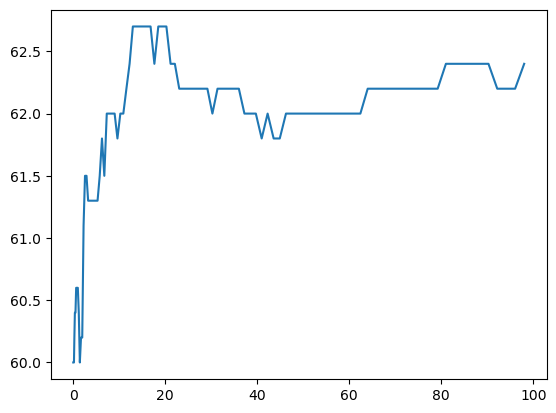

In [7]:
best_index = np.argmax(test_score_li)
best_c = expo_iter[best_index]
fig, ax = plt.subplots()
ax.plot(expo_iter, test_score_li)
plt.show()

In [8]:
best_index

35

In [9]:
best_c

12.96

In [10]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Tạo một dict param_grid với các giá trị kernel
param_grid = {'kernel': kernels}

# Tạo model SVM
svm_model = SVC(C=best_c)

# Áp dụng GridSearchCV với các kernel
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# In kernel tốt nhất và độ chính xác tương ứng
print("Kernel tốt nhất:", grid_search.best_params_['kernel'])
print("Độ chính xác tốt nhất:", grid_search.best_score_)

Kernel tốt nhất: rbf
Độ chính xác tốt nhất: 0.6269128840181587


In [13]:
svm = SVC(kernel='rbf', C=best_c)
svm.fit(X_train, y_train)
preds = svm.predict(X_test)
confusion_matrix = confusion_matrix(y_test, preds)
accuracy_score = accuracy_score(y_test, preds)
precision_score = precision_score(y_test, preds)
recall_score = recall_score(y_test, preds)
f1_score = f1_score(y_test, preds)

print("Best C:", best_c)
print("Confusion matrix:", confusion_matrix)
print("Accuracy score:", accuracy_score)
print("Precision score:", precision_score)
print("Recall score:", recall_score)
print("F1 score:", f1_score)

Best C: 12.96
Confusion matrix: [[256   9]
 [156  21]]
Accuracy score: 0.6266968325791855
Precision score: 0.7
Recall score: 0.11864406779661017
F1 score: 0.20289855072463767


In [14]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
# Perform cross-validation
cv_scores = cross_val_score(svm, X_train, y_train, cv=skf)
cv_accuracy = round(np.mean(cv_scores) * 100, 1)

print('Cross-Validation Accuracy Score: ', cv_accuracy, '%')


Cross-Validation Accuracy Score:  63.0 %


In [15]:
cv_scores

array([0.63608087, 0.62772586, 0.63084112, 0.61838006, 0.63707165])

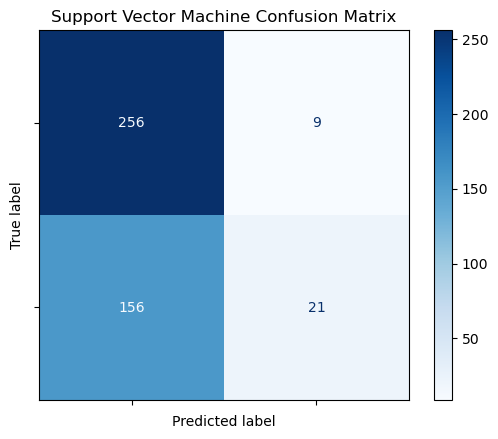

In [16]:
plot_cross_val_confusion_matrix(confusion_matrix, display_labels='', title='Support Vector Machine Confusion Matrix', cv=5)
plt.show()

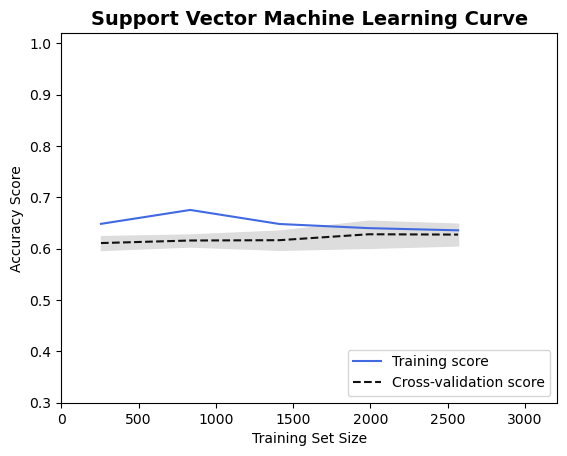

In [17]:
plot_learning_curve(svm, X_train, y_train, scoring='accuracy', training_set_size=5, cv=5, x_min=0, x_max=len(X_train), y_min=0.3, y_max=1.02, title='Support Vector Machine Learning Curve', leg_loc=4)
plt.show()